<a href="https://colab.research.google.com/github/farisnanosoft/emotion-analytics-cnn/blob/main/emo_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

Error: Mountpoint drive should be an existing directory.


In [ ]:
import os
os.chdir("drive/")
!ls

ADFWeek1_Participant.zip	model_lip.h5
Colab Notebooks			model_lip_p_w_vgg16.h5
deploy.prototxt.txt		model_lip_vgg16.h5
drive				Personal
emo_prepro+cv.ipynb		previous_test_concat (1).jpg
emo_vgg16.ipynb			previous_test_concat.jpg
face_detection_cv (1).ipynb	PRO
face_detection_cv.ipynb		__pycache__
kdef_emo_dataset.h5		res10_300x300_ssd_iter_140000.caffemodel
lip_dataset.h5			resnets_utils (1736a74d).py
lip_dataset_p_w.h5		resnets_utils.py
lip_dataset_p_w_v1.h5		SAMSUNG_MEMO
lip_p_w_vgg16.ipynb		test2.jpg
lip_res50.ipynb			test3.jpg
model_celeb_vgg16.h5		test4.jpg
model_emo_vgg16_aug.h5		test6.jpg
model_emo_vgg16.h5		this_message_in_html.htm.odt
model_emo_vgg16_nodense_aug.h5	train_lip.h5
model_emo_vgg16_nodense.h5


In [ ]:
!ls

datalab


In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D, regularizers
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
K.clear_session()

Using TensorFlow backend.


In [ ]:
!pip install keras_vggface

In [ ]:
import numpy as np
from keras_vggface import VGGFace
from keras.preprocessing import image
from keras_vggface import utils
import keras
import unittest

In [ ]:
keras.backend.set_image_dim_ordering('tf')
model = VGGFace(model='vgg16')
model.save('model_celeb_vgg16.h5')

In [ ]:
img = image.load_img('test3.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=1)
preds = model.predict(x)
#print ('\n', "VGG16")
#print('\n',preds)
print('\n','Predicted:', utils.decode_predictions(preds))

In [ ]:
model = load_model('model_celeb_vgg16.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
#with h5py.File("lip_dataset.h5", "r") as hf:
#    X_train_orig, Y_train_orig, X_test_orig, Y_test_orig=hf["train_orig_x"][:],hf["train_orig_y"][:],hf["valid_orig_x"][:],hf["valid_orig_y"][:]
#with h5py.File("lip_dataset_p_w.h5", "r") as hf:
#    X_train_orig, Y_train_orig, X_valid_orig, Y_valid_orig, X_test_orig, Y_test_orig=hf["train_orig_x"][:],hf["train_orig_y"][:],hf["valid_orig_x"][:],hf["valid_orig_y"][:],hf["test_orig_x"][:],hf["test_orig_y"][:]


In [ ]:
#with h5py.File("lip_dataset.h5", "r") as hf:
#    X_train_orig, Y_train_orig, X_test_orig, Y_test_orig=hf["train_orig_x"][:],hf["train_orig_y"][:],hf["valid_orig_x"][:],hf["valid_orig_y"][:]
with h5py.File("kdef_emo_dataset.h5", "r") as hf:
    X_train_orig, Y_train_orig, X_valid_orig, Y_valid_orig, X_test_orig, Y_test_orig=hf["train_orig_x"][:],hf["train_orig_y"][:],hf["valid_orig_x"][:],hf["valid_orig_y"][:],hf["test_orig_x"][:],hf["test_orig_y"][:]

In [ ]:
#X_train_orig, Y_train_orig, X_valid_orig, Y_valid_orig, X_test_orig, Y_test_orig=X_train_orig[Y_train_orig<=10], Y_train_orig[Y_train_orig<=10], X_valid_orig[Y_valid_orig<=10], Y_valid_orig[Y_valid_orig<=10], X_test_orig[Y_test_orig<=10], Y_test_orig[Y_test_orig<=10]
#X_train_orig, Y_train_orig, X_valid_orig, Y_valid_orig, X_test_orig, Y_test_orig=X_train_orig[Y_train_orig!=9], Y_train_orig[Y_train_orig!=9], X_valid_orig[Y_valid_orig!=9], Y_valid_orig[Y_valid_orig!=9], X_test_orig[Y_test_orig!=9], Y_test_orig[Y_test_orig!=9]
#Y_train_orig[1:10]<=10
#Y_train_orig==3
#np.shape(X_train_orig)
#np.any((Y_train_orig==3, Y_train_orig==4, Y_train_orig==6),axis=0)
#X_train_orig, Y_train_orig,X_valid_orig, Y_valid_orig=X_train_orig[np.logical_or(Y_train_orig==3, Y_train_orig==4, Y_train_orig==6)], Y_train_orig[np.logical_or(Y_train_orig==3,Y_train_orig==4,Y_train_orig==6)], X_valid_orig[np.logical_or(Y_valid_orig==3,Y_valid_orig==4,Y_valid_orig==6)], Y_valid_orig[np.logical_or(Y_valid_orig==3,Y_valid_orig==4,Y_valid_orig==6)]
#happy,sad,neutral
#X_train_orig, Y_train_orig, X_valid_orig, Y_valid_orig, X_test_orig, Y_test_orig=X_train_orig[np.any((Y_train_orig==3, Y_train_orig==4, Y_train_orig==6),axis=0)], Y_train_orig[np.any((Y_train_orig==3,Y_train_orig==4,Y_train_orig==6),axis=0)], X_valid_orig[np.any((Y_valid_orig==3,Y_valid_orig==4,Y_valid_orig==6),axis=0)], Y_valid_orig[np.any((Y_valid_orig==3,Y_valid_orig==4,Y_valid_orig==6),axis=0)], X_test_orig[np.any((Y_test_orig==3,Y_test_orig==4,Y_test_orig==6),axis=0)], Y_test_orig[np.any((Y_test_orig==3,Y_test_orig==4,Y_test_orig==6),axis=0)]
#without angry,afraid
X_train_orig, Y_train_orig, X_valid_orig, Y_valid_orig, X_test_orig, Y_test_orig=X_train_orig[np.all((Y_train_orig!=0, Y_train_orig!=2),axis=0)], Y_train_orig[np.all((Y_train_orig!=0,Y_train_orig!=2),axis=0)], X_valid_orig[np.all((Y_valid_orig!=0,Y_valid_orig!=2),axis=0)], Y_valid_orig[np.all((Y_valid_orig!=0,Y_valid_orig!=2),axis=0)], X_test_orig[np.all((Y_test_orig!=0,Y_test_orig!=2),axis=0)], Y_test_orig[np.all((Y_test_orig!=0,Y_test_orig!=2),axis=0)]

In [ ]:
Y_train_orig[1:20]
#np.shape(X_train_orig)

array([3, 0, 4, 2, 1, 3, 0, 4, 2, 1, 3, 0, 4, 2, 1, 3, 0, 4, 2],
      dtype=int32)

In [ ]:
#imshow(X_train_orig[0])
# Normalize image vectors
X_train,X_valid,X_test=[],[],[]
X_train = X_train_orig/255.
X_valid = X_valid_orig/255.
X_test = X_test_orig/255.

#Y_train_orig=Y_train_orig-3
#Y_valid_orig=Y_valid_orig-3
#Y_test_orig=Y_test_orig-3
Y_train_orig[Y_train_orig==6]=Y_train_orig[Y_train_orig==6]-6
Y_valid_orig[Y_valid_orig==6]=Y_valid_orig[Y_valid_orig==6]-6
Y_test_orig[Y_test_orig==6]=Y_test_orig[Y_test_orig==6]-6
Y_train_orig[Y_train_orig==5]=Y_train_orig[Y_train_orig==5]-3
Y_valid_orig[Y_valid_orig==5]=Y_valid_orig[Y_valid_orig==5]-3
Y_test_orig[Y_test_orig==5]=Y_test_orig[Y_test_orig==5]-3
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 5).T
Y_valid = convert_to_one_hot(Y_valid_orig, 5).T
Y_test = convert_to_one_hot(Y_test_orig, 5).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of valid examples = " + str(X_valid.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_valid shape: " + str(X_valid.shape))
print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 295
number of valid examples = 35
number of test examples = 20
X_train shape: (295, 224, 224, 3)
Y_train shape: (295, 5)
X_valid shape: (35, 224, 224, 3)
Y_valid shape: (35, 5)
X_test shape: (20, 224, 224, 3)
Y_test shape: (20, 5)


1


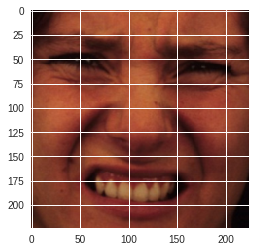

In [ ]:
print(Y_train_orig[4])
imshow(X_train_orig[4])

In [ ]:
#imshow(X_train_orig[0])
# Normalize image vectors
X_train,X_test=[],[]
X_train = X_train_orig/255.
X_test = X_test_orig/255.

Y_train_orig=Y_train_orig-1
Y_test_orig=Y_test_orig-1
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 10).T
Y_test = convert_to_one_hot(Y_test_orig, 10).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 1162
number of test examples = 100
X_train shape: (1162, 224, 224, 3)
Y_train shape: (1162, 10)
X_test shape: (100, 224, 224, 3)
Y_test shape: (100, 10)


In [ ]:
Y_train[50]

array([0., 0., 0., 0., 0., 0., 1.])

In [ ]:
# use transfer learning for re-training the last layers
# Freeze first 25 layers, so that we can retrain 26th and so on using our classes.
#for layer in model.layers[:-5]:
#   layer.trainable = False

for layer in model.layers:
    layer.trainable = False
#seed=0
# Adding our new layers
#top_layers = model.output
top_layers = model.get_layer('flatten').output
#top_layers = Flatten(input_shape=model.output_shape[1:])(top_layers)
#top_layers = Flatten(name='flatten_a')(top_layers)
#top_layers = Dense(10, activation="relu",input_shape=(10,))(top_layers)
#top_layers = Dropout(0.5)(top_layers)
#top_layers = Dense(512, activation="relu")(top_layers)
#top_layers = Dense(64, activation="relu",kernel_regularizer=regularizers.l2(.001),name='output_layer_a')(top_layers)
top_layers = Dense(64, activation="relu",name='output_layer_b')(top_layers)
#top_layers = Dropout(0.3)(top_layers)
top_layers = Dense(5, activation="softmax",name='output_layer_c')(top_layers)

# Add top layers on top of freezed (not re-trained) layers of VGG16
model_final = Model(input = model.input, output = top_layers)

# Compile the model
#model_final.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize test and training data
datagen = ImageDataGenerator(
    channel_shift_range=.3,
    rotation_range=20,
    horizontal_flip=True)
datagen.fit(X_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ou...)`


In [ ]:
model_final.fit(X_train, Y_train, shuffle=True, epochs = 10, batch_size = 64)

In [ ]:
model_final.fit(X_train, Y_train, shuffle=True, epochs = 10, batch_size = 64,validation_data=(X_valid, Y_valid))

Train on 413 samples, validate on 49 samples
Epoch 1/10
413/413 [==============================] - 5s 11ms/step - loss: 1.8303 - acc: 0.3511 - val_loss: 1.5639 - val_acc: 0.6939
Epoch 2/10
413/413 [==============================] - 4s 10ms/step - loss: 1.3932 - acc: 0.7337 - val_loss: 1.2677 - val_acc: 0.7755
Epoch 3/10


KeyboardInterrupt: ignored

In [ ]:
model_final.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),shuffle=True,
                    steps_per_epoch=len(X_train)/32, epochs=23,validation_data=(X_valid, Y_valid),validation_steps=len(X_valid))

Epoch 1/23
10/9 [================================] - 5s 470ms/step - loss: 1.4223 - acc: 0.4864 - val_loss: 1.0597 - val_acc: 0.7714
Epoch 2/23
10/9 [================================] - 5s 464ms/step - loss: 0.9162 - acc: 0.8135 - val_loss: 0.6556 - val_acc: 0.8286
Epoch 3/23
10/9 [================================] - 5s 469ms/step - loss: 0.6103 - acc: 0.9111 - val_loss: 0.4854 - val_acc: 0.8857
Epoch 4/23
10/9 [================================] - 5s 491ms/step - loss: 0.4423 - acc: 0.9339 - val_loss: 0.3685 - val_acc: 0.9143
Epoch 5/23
10/9 [================================] - 5s 466ms/step - loss: 0.3538 - acc: 0.9433 - val_loss: 0.2932 - val_acc: 0.9429
Epoch 6/23
10/9 [================================] - 5s 478ms/step - loss: 0.3244 - acc: 0.9363 - val_loss: 0.2812 - val_acc: 0.9143
Epoch 7/23
10/9 [================================] - 5s 503ms/step - loss: 0.2547 - acc: 0.9591 - val_loss: 0.2464 - val_acc: 0.9143
Epoch 8/23
10/9 [================================] - 5s 495ms/step - 

10/9 [================================] - 5s 469ms/step - loss: 0.1506 - acc: 0.9678 - val_loss: 0.1651 - val_acc: 0.9714
Epoch 13/23
10/9 [================================] - 5s 497ms/step - loss: 0.1540 - acc: 0.9843 - val_loss: 0.1731 - val_acc: 0.9429
Epoch 14/23
10/9 [================================] - 5s 459ms/step - loss: 0.1385 - acc: 0.9678 - val_loss: 0.1635 - val_acc: 0.9714
Epoch 15/23
10/9 [================================] - 5s 465ms/step - loss: 0.1229 - acc: 0.9811 - val_loss: 0.1701 - val_acc: 0.8857
Epoch 16/23
10/9 [================================] - 5s 471ms/step - loss: 0.1286 - acc: 0.9780 - val_loss: 0.1492 - val_acc: 0.9714
Epoch 17/23
10/9 [================================] - 5s 474ms/step - loss: 0.1210 - acc: 0.9811 - val_loss: 0.1455 - val_acc: 0.9714
Epoch 18/23
10/9 [================================] - 5s 471ms/step - loss: 0.0895 - acc: 0.9937 - val_loss: 0.1445 - val_acc: 0.9429
Epoch 19/23
10/9 [================================] - 5s 469ms/step - loss

10/9 [================================] - 5s 468ms/step - loss: 0.0577 - acc: 0.9969 - val_loss: 0.1389 - val_acc: 0.9429


In [ ]:
model_final=load_model('model_emo_vgg16.h5')

In [ ]:
preds = model_final.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

20/20 [==============================] - 0s 15ms/step
Loss = 0.18415750563144684
Test Accuracy = 0.8500000238418579


In [ ]:
model_final.save('model_emo_vgg16_withoutaf_aug.h5')

In [ ]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
__________

In [ ]:
#imshow(X_test[0])
x_e=np.expand_dims(X_test[26], axis=0)
print(model_final.predict(x_e),np.argmax(model_final.predict(x_e))+1,np.argmax(Y_test[26])+1)

[[6.2645689e-02 1.3708321e-02 9.1425158e-02 3.7616809e-04 8.3145058e-01
  2.0481953e-04 1.8932832e-04]] 5 5


Input image shape: (1, 224, 224, 3)
[[0. 0. 1. 0. 0.]] 2


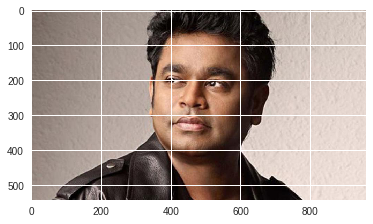

In [ ]:
img_path = 'test3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
i_x = image.img_to_array(img)
i_x = np.expand_dims(i_x, axis=0)
i_x = preprocess_input(i_x)
print('Input image shape:', i_x.shape)
my_image = scipy.misc.imread(img_path)
imshow(my_image)
print(model_final.predict(i_x),np.argmax(model_final.predict(i_x)))

In [ ]:
y_pred_test = model_final.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [ ]:
Y_test_orig[:].T

array([2, 0, 1, 3, 6, 4, 5, 2, 0, 1, 3, 6, 4, 5, 2, 0, 1, 3, 6, 4, 5, 2,
       0, 1, 3, 6, 4, 5], dtype=int32)

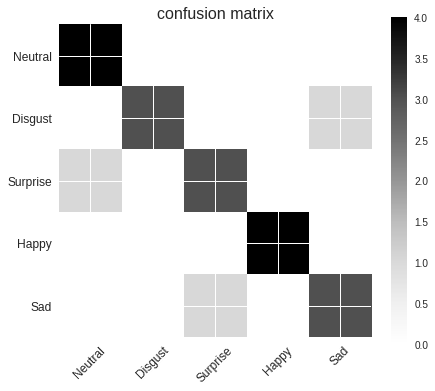

Test accuracy: 0.85


In [ ]:
#y_classes=['Begin','Choose','Connection','Navigation','Next','Previous','Start','Stop','Hello','Web']
#y_classes=['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']
#y_classes=['Happy','Sad','Neutral']
y_classes=['Neutral','Disgust','Surprise','Happy','Sad']
#(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
plt.title('confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(Y_test_orig,y_pred_test_classes))
plt.xticks(np.arange(5),y_classes,rotation=45,fontsize=12)
plt.yticks(np.arange(5),y_classes,fontsize=12)
plt.colorbar()
plt.show()
print('Test accuracy:',accuracy_score(Y_test_orig,y_pred_test_classes))